# RNN Example for Time Series

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('RSCCASN.csv')

In [3]:
df.head()

,observation_date,RSCCASN
0,1992-01-01,6938
1,1992-02-01,7524
2,1992-03-01,8475
3,1992-04-01,9401
4,1992-05-01,9558


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   observation_date  395 non-null    object
 1   RSCCASN           395 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


In [5]:
# Convert 'observation_date' to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  395 non-null    datetime64[ns]
 1   RSCCASN           395 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.3 KB


In [7]:
# Set 'observation_date' as the index
df.set_index('observation_date', inplace=True)

In [8]:
df.head()

,RSCCASN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


### Let's rename the column to `Sales` for our convinience.

In [9]:
df.columns = ['Sales']

In [10]:
df.head()

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


### let's our data

<Axes: xlabel='observation_date'>

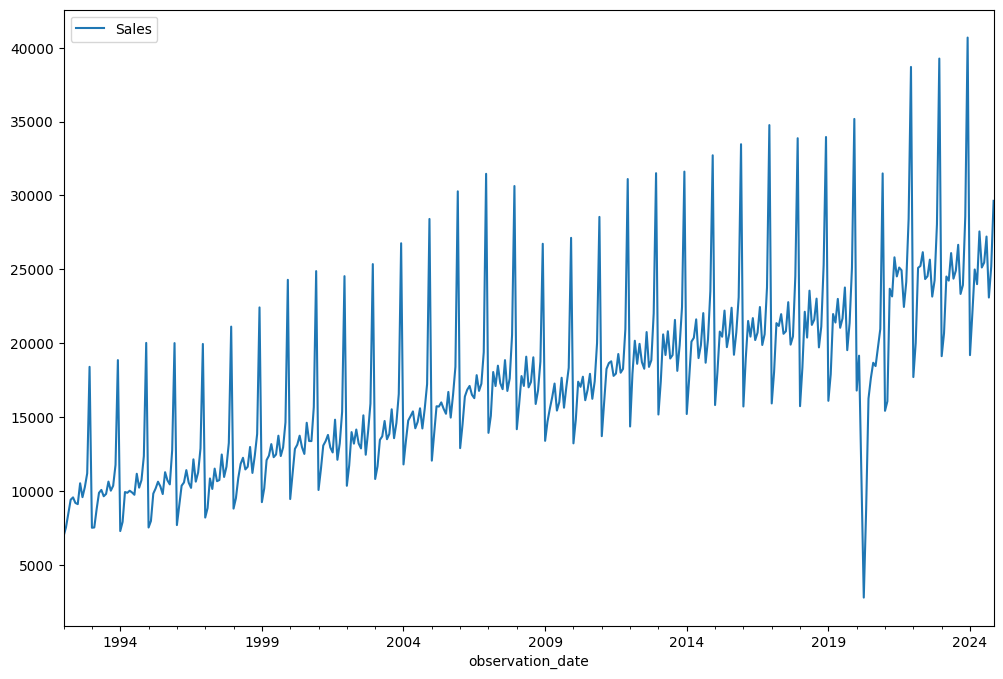

In [11]:
df.plot(figsize=(12,8))

## Train Test Split

In [12]:
len(df)

395

**Data is monthly, let's forecast 1.5 years into the future.**

1.5 years = 18 months

In [13]:
len(df)- 18

377

In [14]:
test_size = 18
test_ind = len(df)- test_size

In [15]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [16]:
train

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-01-01,19118
2023-02-01,20666
2023-03-01,24510


In [17]:
test

,Sales
observation_date,
2023-06-01,24364
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005


## Scale Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler()

**Rephrased**:  
*Ignore the warning as we are only converting the data to float values. We are fitting the scaler only on the training data to ensure that we do not unintentionally use information from the test set, as doing so would lead to data leakage and a biased model.*

In [21]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Time Series Generator

This class is designed to process a sequence of data points collected at consistent intervals, along with time series parameters such as stride and history length, to generate batches for training or validation purposes.

#### Parameters:
- **data**: An indexable data structure (e.g., list or NumPy array) containing consecutive data points (timesteps). The data should be 2D, where axis 0 represents the time dimension.
- **targets**: The target values corresponding to the timesteps in `data`. It must have the same length as `data`.
- **length**: The desired length of the output sequences, specified in terms of the number of timesteps.
- **sampling_rate**: The period between successive individual timesteps within the sequences. For a rate `r`, the sequence will consist of timesteps `data[i]`, `data[i-r]`, ... `data[i-length]`.
- **stride**: The interval between consecutive output sequences. For stride `s`, the output sequences will be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, and so on.
- **start_index**: Specifies the earliest data point to be included in the output sequences. Data points before this index will be excluded. This is useful for reserving a portion of the data for testing or validation.
- **end_index**: Specifies the latest data point to be included in the output sequences. Data points beyond this index will be excluded. This is useful for reserving a portion of the data for testing or validation.
- **shuffle**: A boolean indicating whether to shuffle the output sequences or generate them in chronological order.
- **reverse**: A boolean indicating whether to reverse the order of timesteps in each output sample. If `True`, the timesteps will be in reverse chronological order.
- **batch_size**: The number of time series samples in each batch, excluding the last batch if necessary.

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2025-01-01 11:04:29.544087: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-01 11:04:29.744952: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-01 11:04:29.745029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-01 11:04:29.771101: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-01 11:04:29.838140: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-01 11:04:29.840056: I tensorflow/core/platform/cpu_feature_guard.cc:1

### Let's redefine to get 12 months back and then predict the next month out


We need to make sure that the length of our batch is less than the length of our test set.
`length` below represents the length of the batches.

In [23]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

### let's see what the first batch looks like.

In [24]:
X,y = generator[0]

In [25]:
X

array([[[0.11406802],
        [0.13012854],
        [0.15619262],
        [0.18157152],
        [0.18587442],
        [0.17556938],
        [0.17340423],
        [0.21204813],
        [0.18628553],
        [0.20494971],
        [0.23052046],
        [0.42807027]]])

In [26]:
y

array([[0.12952558]])

In [27]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
Predict this y: 
 [[0.12952558]]


### Create the Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
# We're only using one feature in our time series
n_features = 1

In [30]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

**Patience: The number of epochs with no improvement after which training will be stopped**

In [34]:
# Validation generator

validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [35]:
# fit model
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

/tmp/ipykernel_4392/1350552164.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


Epoch 1/20
365/365 [==============================] - 5s 9ms/step - loss: 0.0200 - val_loss: 0.0055
Epoch 2/20
365/365 [==============================] - 3s 8ms/step - loss: 0.0141 - val_loss: 0.0039
Epoch 3/20
365/365 [==============================] - 3s 8ms/step - loss: 0.0099 - val_loss: 0.0011
Epoch 4/20
365/365 [==============================] - 3s 8ms/step - loss: 0.0077 - val_loss: 9.7266e-04
Epoch 5/20
365/365 [==============================] - 3s 8ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 6/20
365/365 [==============================] - 3s 8ms/step - loss: 0.0051 - val_loss: 6.8052e-04
Epoch 7/20
365/365 [==============================] - 3s 8ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 8/20
365/365 [==============================] - 3s 9ms/step - loss: 0.0040 - val_loss: 0.0122


In [36]:
losses = pd.DataFrame(model.history.history)

<Axes: >

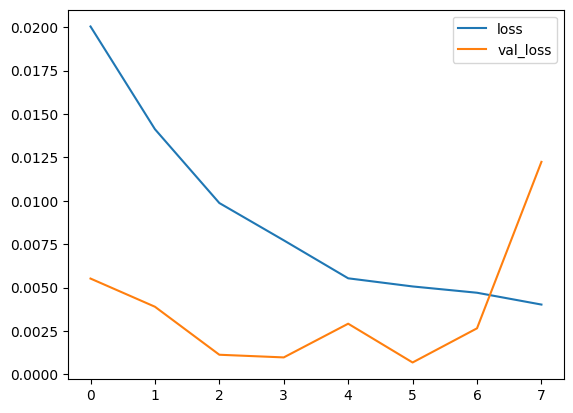

In [37]:
losses.plot()

In [38]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 28ms/step


## Inverse Transformations and Compare

In [39]:
true_predictions = scaler.inverse_transform(test_predictions)

In [40]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

/tmp/ipykernel_4392/1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [41]:
test

,Sales,Predictions
observation_date,,
2023-06-01,24364,28078.639935
2023-07-01,24911,28705.637589
2023-08-01,26657,30422.250870
2023-09-01,23332,27825.452513
2023-10-01,23933,29272.391255
2023-11-01,28580,35439.247732
2023-12-01,40684,53887.959183
2024-01-01,19188,25935.488523
2024-02-01,22005,26629.045768


<Axes: xlabel='observation_date'>

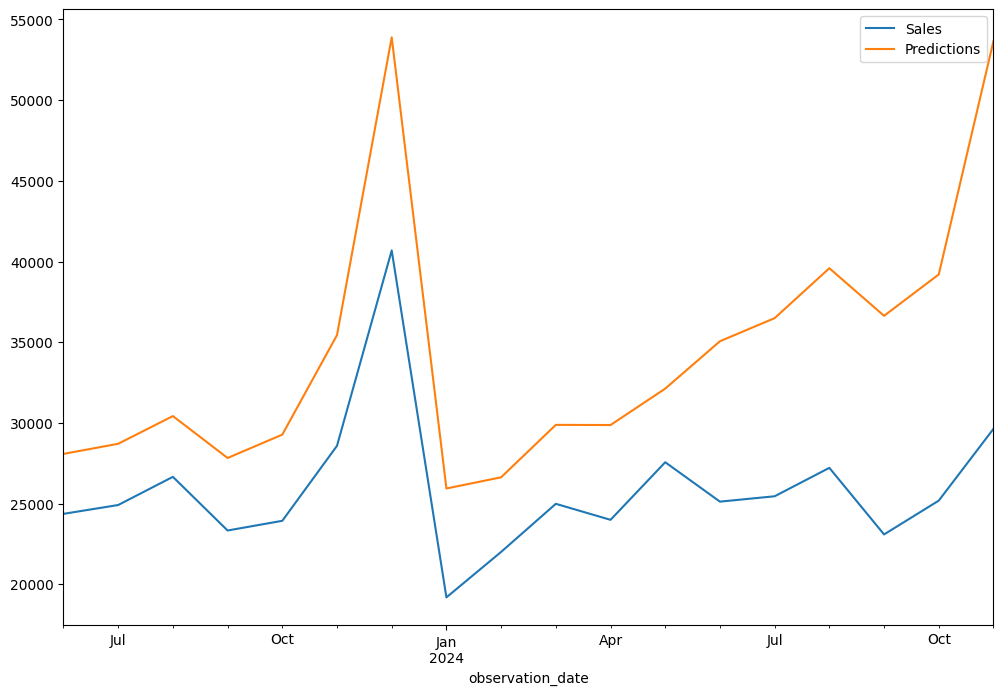

In [42]:
test.plot(figsize=(12,8))

# Retrain and Forecasting

In [43]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [44]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [45]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=4) # The of number of epochs here is informed by the losses.plot() output from our test

Epoch 1/4


/tmp/ipykernel_4392/3958358021.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=4) # The of number of epochs here is informed by the losses.plot() output from our test


383/383 [==============================] - 5s 9ms/step - loss: 0.0209
Epoch 2/4
383/383 [==============================] - 4s 9ms/step - loss: 0.0128
Epoch 3/4
383/383 [==============================] - 5s 12ms/step - loss: 0.0111
Epoch 4/4
383/383 [==============================] - 4s 11ms/step - loss: 0.0074


### The of number of epochs to use for the above training is informed by the `losses.plot()` output from our test.

## Let's Predic into the future now.

In [46]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 27ms/step


In [47]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [48]:
df

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2024-07-01,25453
2024-08-01,27215
2024-09-01,23088


In [49]:
forecast

array([[34233.23056912],
       [18725.93543935],
       [19283.71372855],
       [20087.59287044],
       [19584.30079961],
       [20931.73616093],
       [19516.19819179],
       [19465.87126824],
       [20146.32102582],
       [18040.38470086],
       [19182.55424169],
       [22342.23839301]])

### The above outputs are now the next series of values.

Now we want to add time stamps to the forecast output by adding **forecast index**

Since we are dealing with monthly data we will be interested in prediction with one month into the future. The last date on data frame is `2024-11-01` so we will be using `2024-12-01`. From python frequency link we can see that the monthly frequency can be represented as `MS`.

In [50]:
forecast_index = pd.date_range(start='2024-12-01',periods=periods,freq='MS')

In [51]:
forecast_index

DatetimeIndex(['2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01',
               '2025-04-01', '2025-05-01', '2025-06-01', '2025-07-01',
               '2025-08-01', '2025-09-01', '2025-10-01', '2025-11-01'],
              dtype='datetime64[ns]', freq='MS')

### Let's now a dataframe that convert our `forecast` and our `forecast_index`.

In [52]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [53]:
forecast_df

,Forecast
2024-12-01,34233.230569
2025-01-01,18725.935439
2025-02-01,19283.713729
2025-03-01,20087.592870
2025-04-01,19584.300800
2025-05-01,20931.736161
2025-06-01,19516.198192
2025-07-01,19465.871268
2025-08-01,20146.321026
2025-09-01,18040.384701


<Axes: >

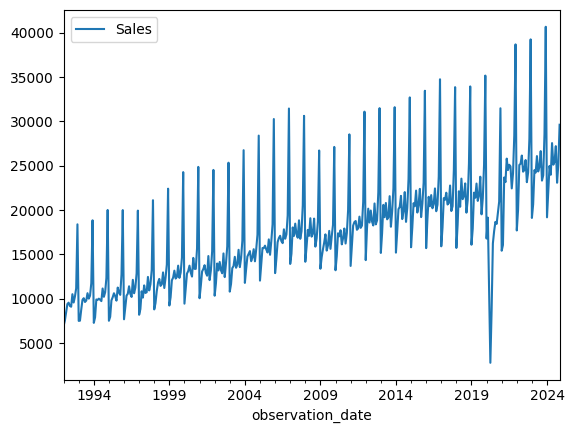

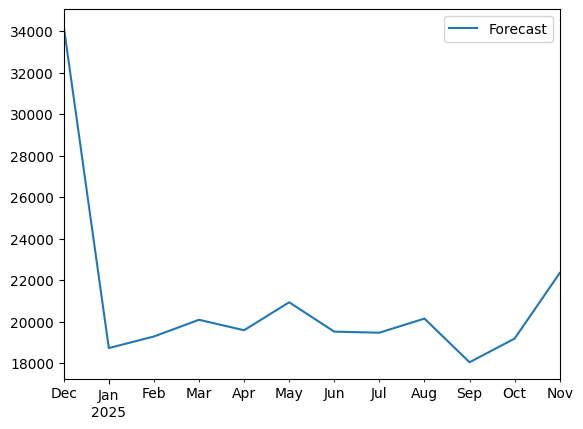

In [54]:
df.plot()
forecast_df.plot()

### let's joing the two plots above into one.

<Axes: xlabel='observation_date'>

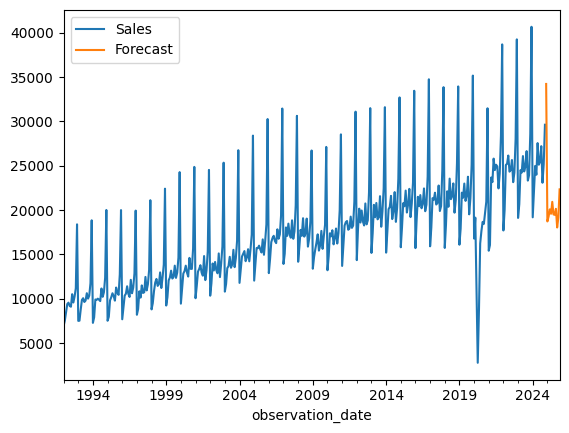

In [55]:
ax = df.plot()
forecast_df.plot(ax=ax)

### Let's zoom in for a clearer view.

(588.0, 671.0)

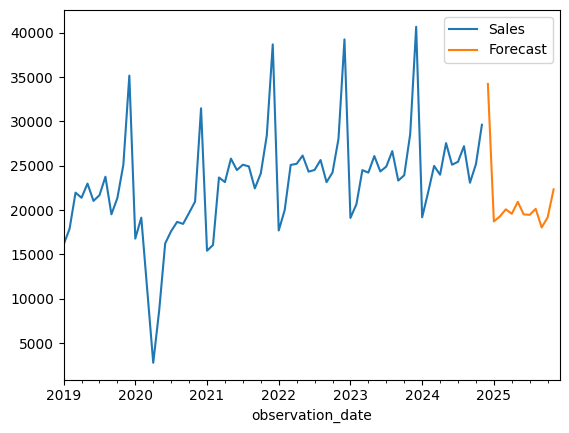

In [57]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2019-01-01','2025-12-01')